In [216]:
#Import pandas, numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# File path
morbidity_file_path = 'database_var.csv'

# Read the CSV file into a DataFrame with 'latin-1' encoding
morbidity_df = pd.read_csv(morbidity_file_path, encoding='latin-1')

In [217]:
# Mapping of variable numbers to variable names
variable_mapping_morbidity = {
    'v1': 'Geography',
    'v2': 'Geography Type',
    'v3': 'Geography Note',
    'v4': 'Year Grouping',
    'v5': 'Gender',
    'v6': 'Hospital morbidity',
    'v7': 'Diseases of the circulatory system',
    'v8': 'Heart disease',
    'v9': 'Diseases of the digestive system',
    'v10': 'Diseases of intestine and peritoneum',
    'v11': 'Diseases of gallbladder',
    'v12': 'Diseases of esophagus, stomach and duodenum',
    'v13': 'Ulcer',
    'v14': 'Diseases of the respiratory system',
    'v15': 'Chronic obstructions, pulmonary diseases, etc',
    'v16': 'Pneumonia',
    'v17': 'Asthma',
    'v18': 'Diseases of the upper respiratory tract',
    'v19': 'Chronic diseases of tonsils and adenoids',
    'v20': 'Acute upper respiratory infections',
    'v21': 'Diseases of the genitourinary system',
    'v22': 'Diseases of female genital organs',
    'v23': 'Diseases of the urinary system',
    'v24': 'Diseases of male genital organs',
    'v25': 'Injury and poisoning',
    'v26': 'Fractures',
    'v27': 'Neoplasms (cancer)',
    'v28': 'Malignant neoplasms',
    'v29': 'Age Group: Less than 20',
    'v30': 'Age Group: 0-4',
    'v31': 'Age Group: 5-9',
    'v32': 'Age Group: 10-14',
    'v33': 'Age Group: 15-19',
    'v34': 'Age Group: 20 to 34',
    'v35': 'Age Group: 20-24',
    'v36': 'Age Group: 25-29',
    'v37': 'Age Group: 30-34',
    'v38': 'Age Group: 35 to 54',
    'v39': 'Age Group: 35-39',
    'v40': 'Age Group: 40-44',
    'v41': 'Age Group: 45-49',
    'v42': 'Age Group: 50-54',
    'v43': 'Age Group: 55+',
    'v44': 'Age Group: 55-59',
    'v45': 'Age Group: 60-64',
    'v46': 'Age Group: 65+',
    'v47': 'Age Group: 65-74',
    'v48': 'Age Group: 75-84',
    'v49': 'Age Group: 85+',
    'v50': 'Age Group: 60+',
    'v51': 'Other diagnoses',
    'v52': 'Other diagnoses: Age less than 20',
    'v53': 'Other diagnoses: Age 20-39',
    'v54': 'Other diagnoses: Age 40-59',
    'v55': 'Other diagnoses: Age 60+',
    'v56': 'Median age',
    'v57': 'Days in hospital (average)'
}

# Rename columns using the mapping
morbidity_df.rename(columns=variable_mapping_morbidity, inplace=True)

In [231]:
#check missing values

missing_values = morbidity_df.isnull().sum()
print("Missing values:\n", missing_values)

# Check data types of columns
print("\nData types:\n", morbidity_df.dtypes)

Missing values:
 Geography                                           0
Geography Type                                      0
Geography Note                                   7436
Year Grouping                                       0
Gender                                              0
Hospital morbidity                                  0
Diseases of the circulatory system                  0
Heart disease                                       0
Diseases of the digestive system                    0
Diseases of intestine and peritoneum                0
Diseases of gallbladder                             0
Diseases of esophagus, stomach and duodenum         0
Ulcer                                               0
Diseases of the respiratory system                  0
Chronic obstructions, pulmonary diseases, etc       0
Pneumonia                                           0
Asthma                                              0
Diseases of the upper respiratory tract             0
Chronic dis

In [230]:
# Step 2: Data Type Conversion (if needed)
# Ensure 'Median age' and 'Days in hospital (average)' are of numerical type
morbidity_df['Median age'] = pd.to_numeric(morbidity_df['Median age'], errors='coerce')
morbidity_df['Days in hospital (average)'] = pd.to_numeric(morbidity_df['Days in hospital (average)'], errors='coerce')

In [220]:
# Filter data where 'Geography Type' is 'Health Authority'
health_authority_data = morbidity_df[morbidity_df['Geography Type'] == 'Health Authority']

# Display the filtered data
print(health_authority_data)

                                Geography    Geography Type Geography Note  \
0      Labrador-Grenfell Health Authority  Health Authority            NaN   
1                Western Health Authority  Health Authority            NaN   
2                Central Health Authority  Health Authority            NaN   
3                Eastern Health Authority  Health Authority            NaN   
684    Labrador-Grenfell Health Authority  Health Authority            NaN   
...                                   ...               ...            ...   
17275            Eastern Health Authority  Health Authority            NaN   
17997  Labrador-Grenfell Health Authority  Health Authority            NaN   
17998            Western Health Authority  Health Authority            NaN   
17999            Central Health Authority  Health Authority            NaN   
18000            Eastern Health Authority  Health Authority            NaN   

       Year Grouping Gender Hospital morbidity  \
0            

In [298]:
#features
features = [
    'Diseases of the circulatory system',
    'Heart disease',
    'Diseases of the upper respiratory tract',
    'Diseases of the respiratory system',
    'Diseases of gallbladder',
    'Diseases of the genitourinary system',
    'Diseases of the urinary system',
    'Diseases of intestine and peritoneum',
    'Diseases of esophagus, stomach and duodenum',
    'Other diagnoses',
    'Asthma',
    'Chronic obstructions, pulmonary diseases, etc',
    'Chronic diseases of tonsils and adenoids',
    'Acute upper respiratory infections', 
    'Neoplasms (cancer)',
    'Malignant neoplasms',
    'Pneumonia',
    'Fractures',
    'Age Group: Less than 20',
    'Age Group: 20 to 34',
    'Age Group: 35 to 54',
    'Age Group: 55-59',
    'Age Group: 60-64',
    'Age Group: 65-74',
    'Age Group: 75-84',
    'Age Group: 85+',
    'Ulcer'
]

In [299]:
# Target variable
target_variable = 'Days in hospital (average)'

In [300]:
X = health_authority_data[features]
y = health_authority_data[target_variable]

In [301]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.8673318181818179


In [302]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predict on the test set
y_pred = best_gb_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.7868640055287203
Mean Absolute Error (MAE): 0.7059652790582747


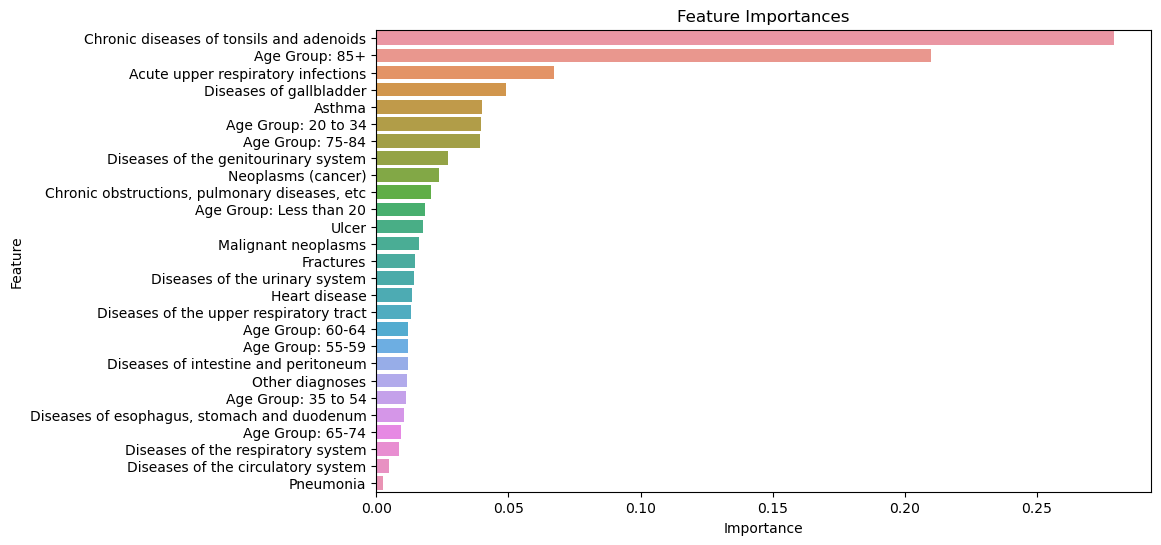

In [305]:
# Get feature importances from the model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [306]:
# gradient boosting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Fit the model
gb_regressor.fit(X_train, y_train)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],     # Shrinkage parameter
    'max_depth': [3, 5, 7],                 # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10]         # Minimum samples required to split a node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best MSE Score found: ", -grid_search.best_score_)

# Predict on the test set with the best model
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best MSE Score found:  0.5334270395203512
Mean Squared Error on Test Set: 0.7737188890207407


In [234]:

# New Data


#features
features2 = [
    'Heart disease',
    'Diseases of the upper respiratory tract',
    'Diseases of the respiratory system',
    'Diseases of gallbladder',
    'Diseases of the genitourinary system',
    'Diseases of the urinary system',
    'Other diagnoses',
    'Asthma',
    'Chronic obstructions, pulmonary diseases, etc',
    'Acute upper respiratory infections', 
    'Pneumonia',
    'Fractures',
    'Age Group: Less than 20',
    'Age Group: 20 to 34',
    'Age Group: 35 to 54',
    'Age Group: 55+',
    'Ulcer',
    'Median age',
    'Neoplasms (cancer)',
     'Malignant neoplasms'
]


target_variable2 = 'Days in hospital (average)'

# Subset the dataframe with selected features and target
X = morbidity_df[features2]
y = morbidity_df[target_variable2]

# 3. Predictions
# Use best_gb_model to predict
y_pred_new = best_gb_model.predict(X_new)

# Example: Printing the predictions
print(y_pred_new)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'Heart disease'

In [233]:
# Descriptive statistics
print(morbidity_df['Hospital morbidity'].describe())

# Convert 'Hospital morbidity' to numeric, coerce errors to NaN for non-numeric values
morbidity_df['Hospital morbidity'] = pd.to_numeric(morbidity_df['Hospital morbidity'], errors='coerce')

# Check the data type after conversion
print(morbidity_df['Hospital morbidity'].dtype)


count     18484
unique     1681
top          ..
freq       4332
Name: Hospital morbidity, dtype: object
float64


In [101]:
# Descriptive statistics for 'Days in hospital (average)'
print(morbidity_df['Days in hospital (average)'].describe())


count    13979.000000
mean         7.983690
std          2.566783
min          3.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         64.000000
Name: Days in hospital (average), dtype: float64
